## 7. Uygulama (Bitcoin - Dolar artış tahmin)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3392.0,1.456395e+04,1.618236e+04,1.768970e+02,9.103510e+02,8.237045e+03,2.374384e+04,6.754973e+04
High,3392.0,1.490452e+04,1.657076e+04,2.117310e+02,9.234638e+02,8.394890e+03,2.420518e+04,6.878962e+04
Low,3392.0,1.419715e+04,1.574689e+04,1.715100e+02,8.965573e+02,8.034995e+03,2.324377e+04,6.638206e+04
Close,3392.0,1.457491e+04,1.618452e+04,1.781030e+02,9.159892e+02,8.244672e+03,2.377668e+04,6.756683e+04
Adj Close,3392.0,1.457491e+04,1.618452e+04,1.781030e+02,9.159892e+02,8.244672e+03,2.377668e+04,6.756683e+04
Volume,3392.0,1.654903e+10,1.908743e+10,5.914570e+06,1.554558e+08,1.146727e+10,2.686730e+10,3.509679e+11


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3392 non-null   object 
 1   Open       3392 non-null   float64
 2   High       3392 non-null   float64
 3   Low        3392 non-null   float64
 4   Close      3392 non-null   float64
 5   Adj Close  3392 non-null   float64
 6   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 185.6+ KB


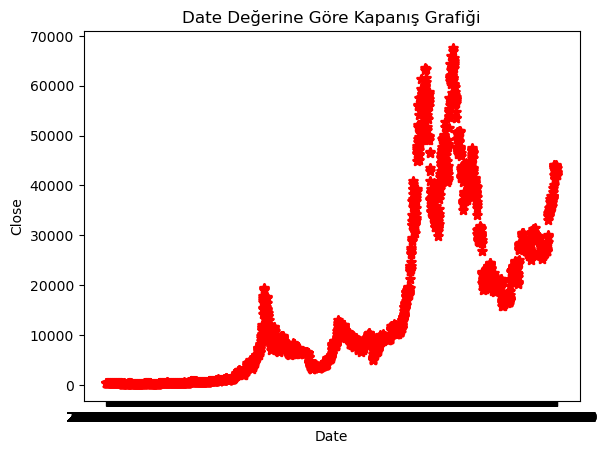

In [11]:
#date göre close değeri grafiği
plt.scatter(df['Date'], df['Close'], marker='*', linewidth=2, color='red')
plt.title('Date Değerine Göre Kapanış Grafiği') 
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

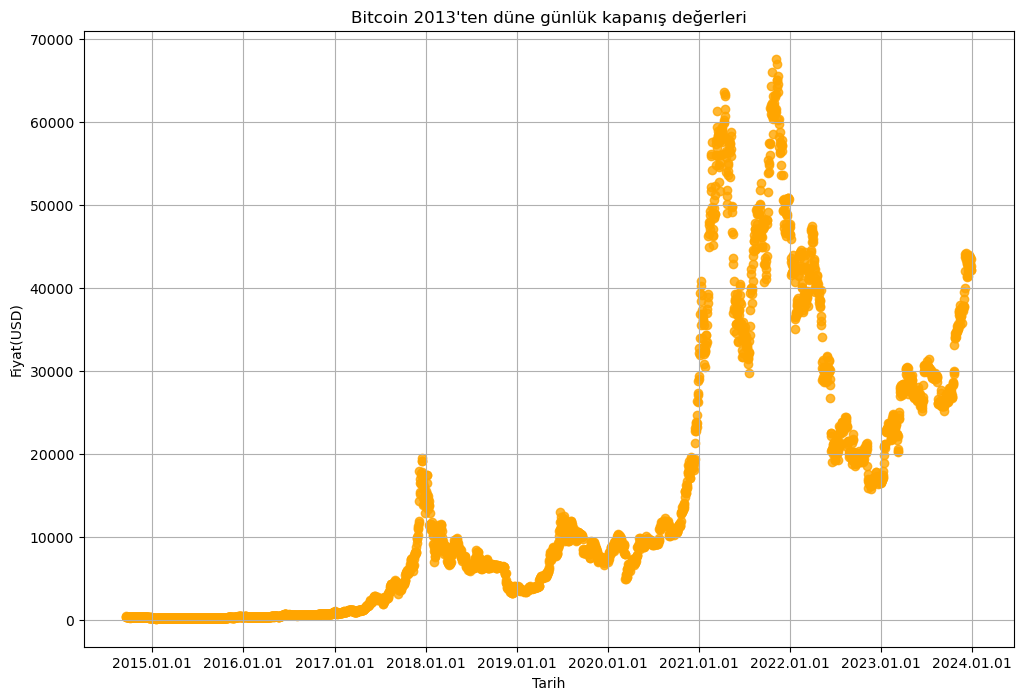

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12,8))   #grafiğin genişlik-yükseklik değeri belirleme

sns.scatterplot(data=df, x='Date', y='Close', alpha=0.8, color='orange') 
#plt.scatter(data=df, x='Date', y='Close', alpha=0.8, color='orange') #bunu kullanmadık çünkü noktalar şeffaf değil ve aynı rengin ton geçişi yok

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) #AutoDateLocator choose month-names according to your locale.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

plt.title("Bitcoin 2013'ten düne günlük kapanış değerleri") 
plt.xlabel('Tarih')
plt.ylabel('Fiyat(USD)')
plt.grid(True)
plt.show()


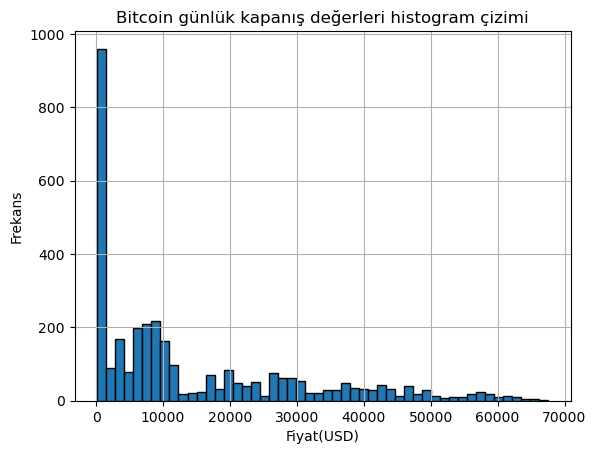

In [43]:

#histogram oluşturma
plt.hist(df['Close'], bins=50, edgecolor='k') #edgecolor her parçanın kenarını boyar kalıp gibi gösterir.

#başlık ve etiketler
plt.title("Bitcoin günlük kapanış değerleri histogram çizimi") 
plt.xlabel('Fiyat(USD)')
plt.ylabel('Frekans')
plt.grid()
plt.show()

In [23]:
bitcoin_df = pd.read_csv('BTC-USD.csv')
projection_bitcoin= 14  #14 günlük projeksiyon izlemek istiyoruz o yüzden 14 günlük yer açıcaz dfte
bitcoin_df['Prediction'] = bitcoin_df[['Close']].shift(-projection_bitcoin)
print(bitcoin_df['Prediction'])#prediction değişkenine sondan 14 günlük yer ayırdı shift ile
X_Bitcoin = np.array(bitcoin_df[['Close']])
X_Bitcoin = X_Bitcoin[:-projection_bitcoin]
print(X_Bitcoin)

0       383.614990
1       375.071991
2       359.511993
3       328.865997
4       320.510010
           ...    
3387           NaN
3388           NaN
3389           NaN
3390           NaN
3391           NaN
Name: Prediction, Length: 3392, dtype: float64
[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [43023.972656]
 [41929.757813]
 [42240.117188]]


In [49]:
bitcoin_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,383.614990
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,375.071991
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,359.511993
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,328.865997
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,320.510010


In [51]:
#type(bitcoin_df[['Close']])

pandas.core.frame.DataFrame

In [53]:
#type(bitcoin_df['Close'])

pandas.core.series.Series

In [57]:
y_Bitcoin = bitcoin_df['Prediction'].values
y_Bitcoin = y_Bitcoin[:-projection_bitcoin]
print(y_Bitcoin)
x_train_Bitcoin, x_test_Bitcoin, y_train_Bitcoin, y_test_Bitcoin = train_test_split(X_Bitcoin, y_Bitcoin, test_size=0.20)

[  383.61499    375.071991   359.511993 ... 42627.855469 42099.402344
 42156.902344]


## Lineer regresyon kullanılarak modelin eğitilmesi
- lineer regresyon linReg_Bitcoin deeğişkenine tanımların
- lineer regresyon kullanılarak model eğitilir.
- .score() fonksiyonu kullanılarak modelin Güvenilirliği hesaplanır

In [60]:
linReg_Bitcoin = LinearRegression() #7. dersteki Gradient Descent uygulamalarımız burda LinearRegression nesnesinin arka planında yapılıyor.
linReg_Bitcoin.fit(x_train_Bitcoin, y_train_Bitcoin)
linReg_confidence_Bitcoin = linReg_Bitcoin.score(x_test_Bitcoin, y_test_Bitcoin)
print("Bitcoin için lineer regresyon güvenilirliği: %", round((linReg_confidence_Bitcoin*100),3))

Bitcoin için lineer regresyon güvenilirliği: % 95.743


## Parametrelerin Bulunması
- coef_
- intercept_

## Tahmin yapabilmek için sondan projection_Bitcoin değişkeni kadar kapanış değerinin değişkene atılması

In [65]:
x_projection_Bitcoin = np.array(bitcoin_df[['Close']])[-projection_bitcoin:]
x_projection_Bitcoin

array([[41364.664063],
       [42623.539063],
       [42270.527344],
       [43652.25    ],
       [43869.152344],
       [43997.902344],
       [43739.542969],
       [43016.117188],
       [43613.140625],
       [42520.402344],
       [43442.855469],
       [42627.855469],
       [42099.402344],
       [42156.902344]])

## .predict() fonksiyonu kullanılarak istenilen değer kadar tahmin oluşturulması

In [68]:
linReg_prediction_Bitcoin = linReg_Bitcoin.predict(x_projection_Bitcoin)
linReg_prediction_Bitcoin

array([41180.10631964, 42422.63538057, 42074.20736373, 43437.98895779,
       43652.0749201 , 43779.15315789, 43524.14846592, 42810.11605101,
       43399.38740085, 42320.83784658, 43231.31332283, 42426.89573994,
       41905.3043467 , 41962.05773445])

## Tahmin edilen değerlerin grafikte gösterilmesi

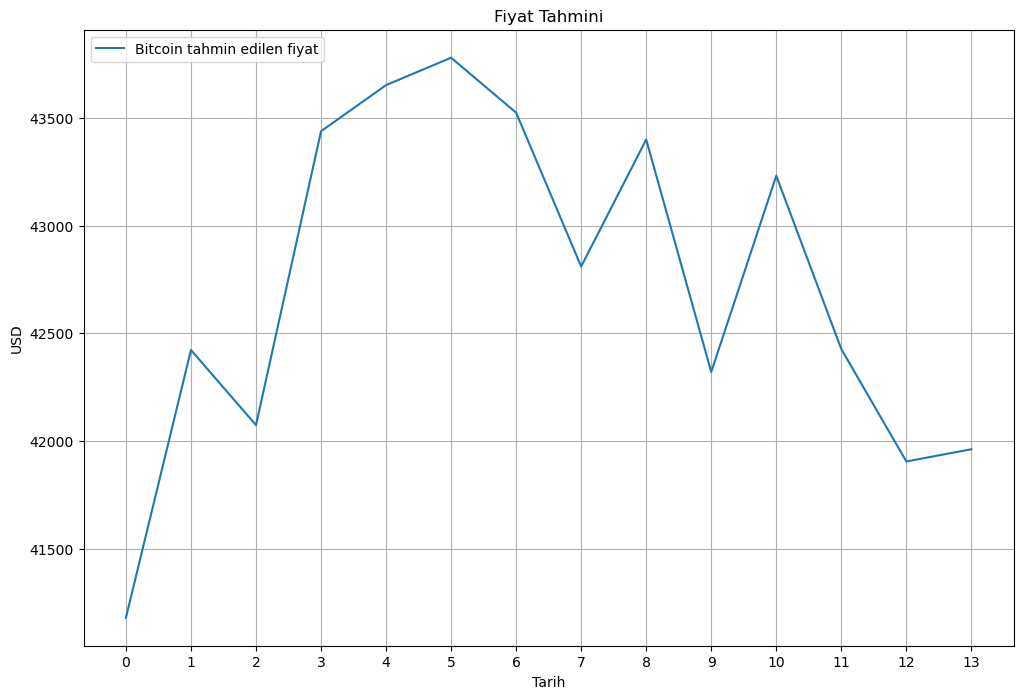

In [73]:
plt.figure(figsize=(12,8))
plt.plot(linReg_prediction_Bitcoin, label='Bitcoin tahmin edilen fiyat')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.title("Fiyat Tahmini") 
plt.xlabel('Tarih')
plt.ylabel('USD')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

## Şimdi de modelimizin oluşturduğu grafik ile gerçek değerleri karşılaştıralım

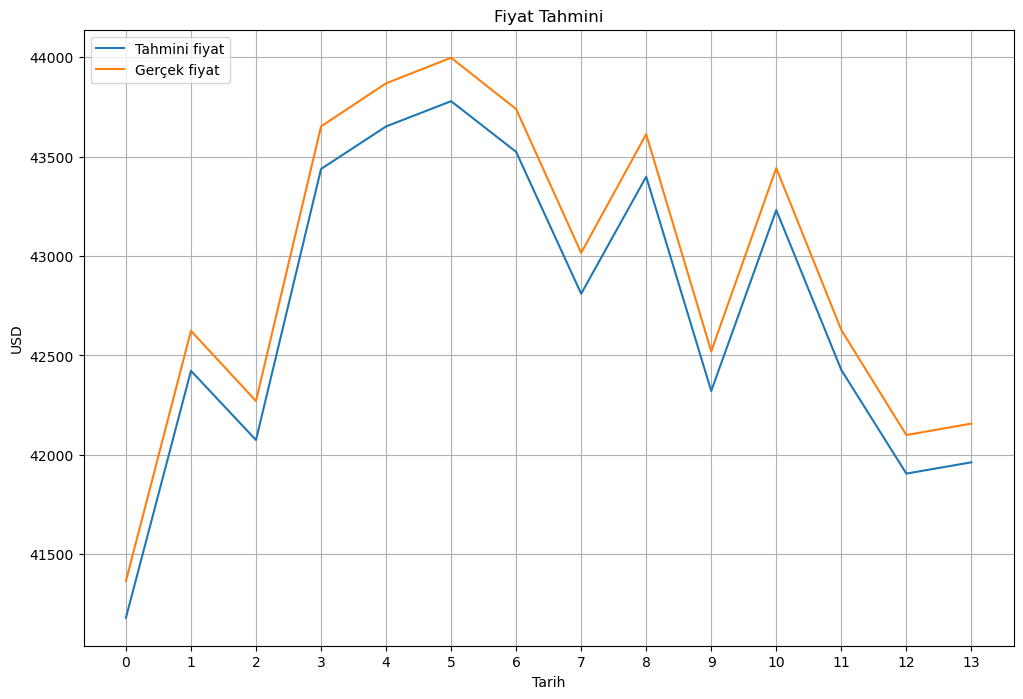

In [76]:
plt.figure(figsize=(12,8))
plt.plot(linReg_prediction_Bitcoin, label='Tahmini fiyat')
plt.plot(x_projection_Bitcoin, label='Gerçek fiyat')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.title("Fiyat Tahmini") 
plt.xlabel('Tarih')
plt.ylabel('USD')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()